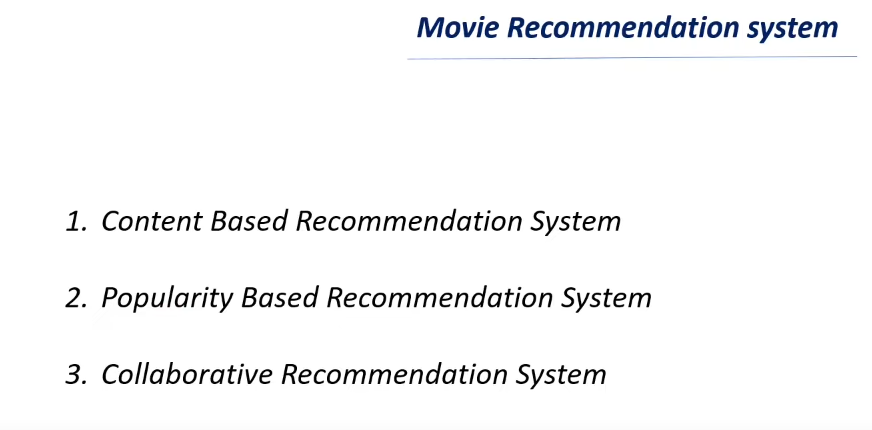

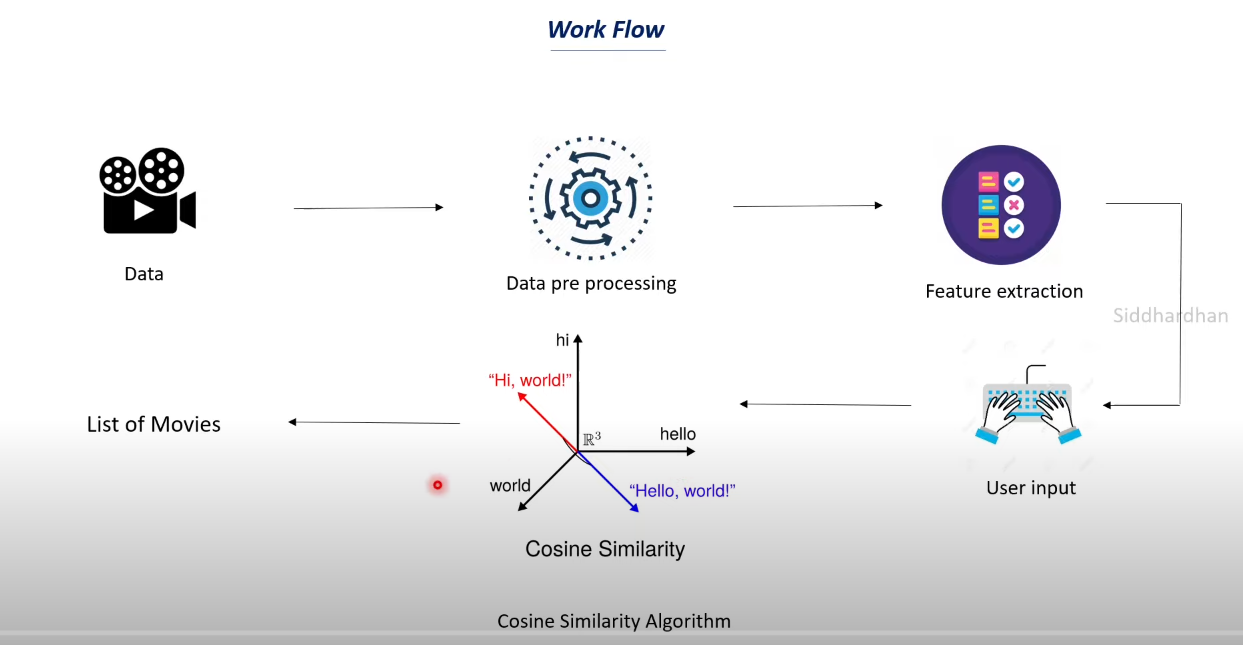

#### import all dependencies

In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\Shashi Shekhar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### Data collection and preprocessing

In [2]:
# loading the data fron the csv file to pandas dataframe
data=pd.read_csv(r"C:\Users\Shashi Shekhar\Desktop\python\Dataset for resume projects\movies.csv")
data.shape

(4803, 24)

In [3]:
# getting 1st 5 rows as 
data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
# getting last 5 rows
data.tail()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia
4802,4802,0,Documentary,NaN,25975,obsession camcorder crush dream girl,en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16,Drew Barrymore Brian Herzlinger Corey Feldman ...,"[{'name': 'Clark Peterson', 'gender': 2, 'depa...",Brian Herzlinger


In [6]:
# selecting the relevant features for recommendation
selected_features =["genres", "keywords","tagline", "cast", "director"]
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [8]:
# replacing the null values by null string
for feature in selected_features:
    data[feature]=data[feature].fillna(" ")

In [9]:
# combining all features which selected
combined_features = data["genres"]+" "+data["keywords"]+" "+data["tagline"]+" "+data["cast"]+" "+data["director"]
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance   A newlywed couple's honeymoon...
4800    Comedy Drama Romance TV Movie date love at fir...
4801        A New Yorker in Shanghai Daniel Henney Eli...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [10]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [12]:
features_vectors=vectorizer.fit_transform(combined_features)
print(features_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [13]:
# getting similarity score using cosine similarity
similarity=cosine_similarity(features_vectors)
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [14]:
similarity.shape

(4803, 4803)

In [17]:
# getting the name from user as:
movie_name=input("Enter your favourite movie name : ")

Enter your favourite movie name : iron man


In [20]:
# creating a list of all name of movie in dataset as:
list_of_movies=data["title"].tolist()
print(list_of_movies)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [21]:
# finding the close match for the movie name given by user
find_close_match = difflib.get_close_matches(movie_name, list_of_movies)
find_close_match

['Iron Man', 'Iron Man 3', 'Iron Man 2']

In [22]:
close_match=find_close_match[0]
close_match

'Iron Man'

In [24]:
# finding the index of the movie with title
index_of_the_movie=data[data["title"]==close_match]["index"].values[0]
index_of_the_movie

68

In [26]:
# getting alist of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.033570748780675445), (1, 0.0546448279236134), (2, 0.013735500604224323), (3, 0.006468756104392058), (4, 0.03268943310073386), (5, 0.013907256685755473), (6, 0.07692837576335507), (7, 0.23944423963486405), (8, 0.007882387851851008), (9, 0.07599206098164225), (10, 0.07536074882460438), (11, 0.01192606921174529), (12, 0.013707618139948929), (13, 0.012376074925089967), (14, 0.09657127116284188), (15, 0.007286271383816743), (16, 0.22704403782296803), (17, 0.013112928084103857), (18, 0.04140526820609594), (19, 0.07883282546834255), (20, 0.07981173664799915), (21, 0.011266873271064948), (22, 0.006892575895462364), (23, 0.006599097891242659), (24, 0.012665208122549737), (25, 0.0), (26, 0.21566241096831154), (27, 0.030581282093826635), (28, 0.061074402219665376), (29, 0.014046184258938898), (30, 0.0807734659476981), (31, 0.31467052449477506), (32, 0.02878209913426701), (33, 0.13089810941050173), (34, 0.0), (35, 0.035350090674865595), (36, 0.03185325269937555), (37, 0.008024326882532318),

In [27]:
len(similarity_score)

4803

In [29]:
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse=True)
print(sorted_similar_movies)

[(68, 1.0000000000000002), (79, 0.40890433998005965), (31, 0.31467052449477506), (7, 0.23944423963486405), (16, 0.22704403782296803), (26, 0.21566241096831154), (85, 0.20615862984665329), (182, 0.19573956139611606), (511, 0.16702973947860686), (3623, 0.1609246088135586), (64, 0.15299924139445145), (203, 0.14818667948665118), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826294), (46, 0.14216268867232237), (169, 0.1380947013224906), (1740, 0.13624382641690763), (94, 0.1361681957902901), (788, 0.1330589507422922), (126, 0.13263982780511066), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910507), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483321), (661, 0.11719294096248463), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661253), (1553, 0.1079782217151326), (1451, 0.107849394974707), (242, 0.10630339022327012), (618, 0.

In [30]:
len(sorted_similar_movies)

4803

In [36]:
# print the similar movies name based on index
print("Movie suggested for you : \n")

i=1
for movie in sorted_similar_movies:
    index=movie[0]
    movie_from_index=data[data.index==index]["title"].values[0]
    if (i < 30):
        print(i, ".", movie_from_index)
        i+=1

Movie suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow


#### Movie recommendation system

In [38]:
# getting the name from user as:
movie_name=input("Enter your favourite movie name : ")
# creating a list of all name of movie in dataset as:
list_of_movies=data["title"].tolist()
# finding the close match for the movie name given by user
find_close_match = difflib.get_close_matches(movie_name, list_of_movies)
close_match=find_close_match[0]
# finding the index of the movie with title
index_of_the_movie=data[data["title"]==close_match]["index"].values[0]
# getting alist of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
# sorting the movies based on their similarity score
sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse=True)
# print the similar movies name based on index
print("Movie suggested for you : \n")

i=1
for movie in sorted_similar_movies:
    index=movie[0]
    movie_from_index=data[data.index==index]["title"].values[0]
    if (i < 30):
        print(i, ".", movie_from_index)
        i+=1

Enter your favourite movie name : avtar
Movie suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander
